In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Churn.xlsx to Churn.xlsx


In [3]:
# Load the Dataset
data=pd.read_excel("Churn.xlsx")

In [5]:
data.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

In [7]:
# Check the shape of the dataset
data.shape


(5000, 21)

In [9]:
# Check data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [11]:
# Check the missing values
data.isnull().sum()


Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [13]:
#summary statistics
data.describe()


Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  5000.000000      5000.00000     5000.000000  5000.000000  5000.000000   
mean   2500.500000       100.25860        7.755200    10.261780     4.435200   
std    1443.520003        39.69456       13.546393     2.761396     2.456788   
min       1.000000         1.00000        0.000000     0.000000     0.000000   
25%    1250.750000        73.00000        0.000000     8.500000     3.000000   
50%    2500.500000       100.00000        0.000000    10.300000     4.000000   
75%    3750.250000       127.00000       17.000000    12.000000     6.000000   
max    5000.000000       243.00000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls    eve.calls   eve.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.771196   180.288900   100.029400   100.191000    17.054322   
std       0.745514    53.894699    19.831197    19.826496     4.296843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    87.000000    14.140000   
50%       2.780000   180.100000   100.000000   100.000000    17.090000   
75%       3.240000   216.200000   113.000000   114.000000    19.900000   
max       5.400000   351.500000   165.000000   170.000000    30.910000   

        night.mins  night.calls  night.charge  customer.calls  
count  5000.000000  5000.000000   5000.000000     5000.000000  
mean    200.391620    99.919200      9.017732        1.570400  
std      50.527789    19.958686      2.273763        1.306363  
min       0.000000     0.000000      0.000000        0.000000  
25%     166.900000    87.000000      7.510000        1.000000  
50%     200.400000   100.000000      9.020000        1.000000  
75%     234.700000   113.000000     10.560000        2.000000  
max     395.000000   175.000000     17.770000        9.000000

In [15]:
numerical_columns=data.select_dtypes(include=['number']).columns
print("Numerical columns:",numerical_columns)

Numerical columns: Index(['Unnamed: 0', 'account.length', 'voice.messages', 'intl.mins',
       'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'eve.calls',
       'eve.charge', 'night.mins', 'night.calls', 'night.charge',
       'customer.calls'],
      dtype='object')


churn
no     85.86
yes    14.14
Name: proportion, dtype: float64


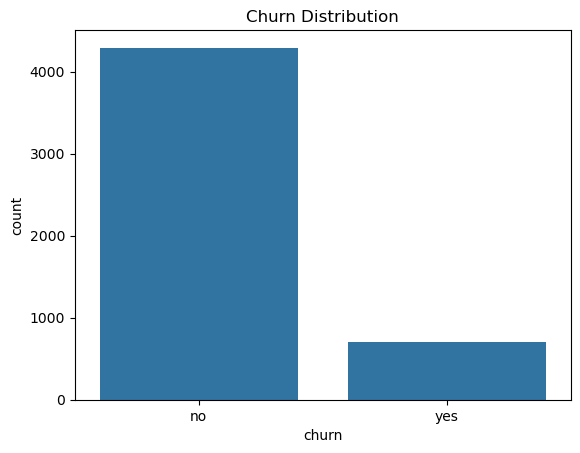

In [17]:
#Calculate churn rate
churn_rate = data['churn'].value_counts(normalize=True) * 100
print(churn_rate)

#Visualize churn distribution
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()


<Figure size 800x500 with 0 Axes>

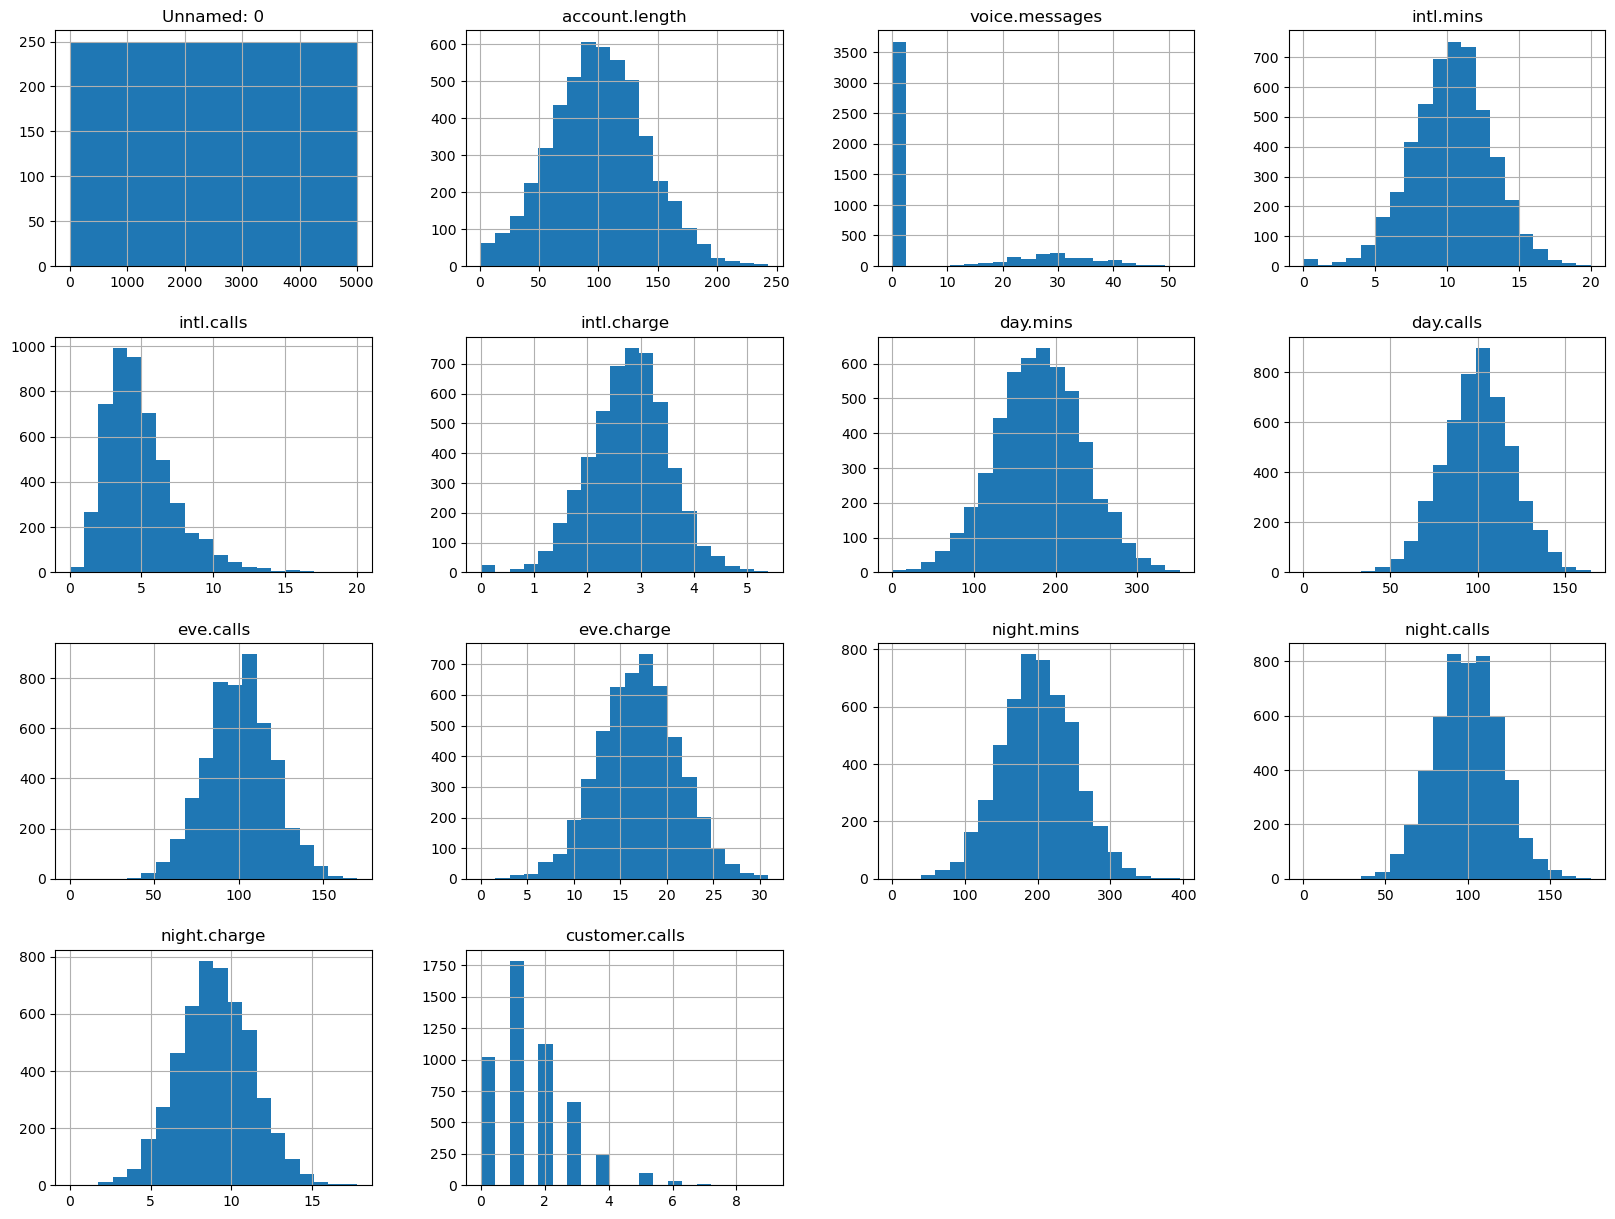

In [18]:
# Histograms of numerical columns
plt.figure(figsize=(8, 5))
import matplotlib.pyplot as plt
data[numerical_columns].hist(bins=20,figsize=(20,15))
plt.show()

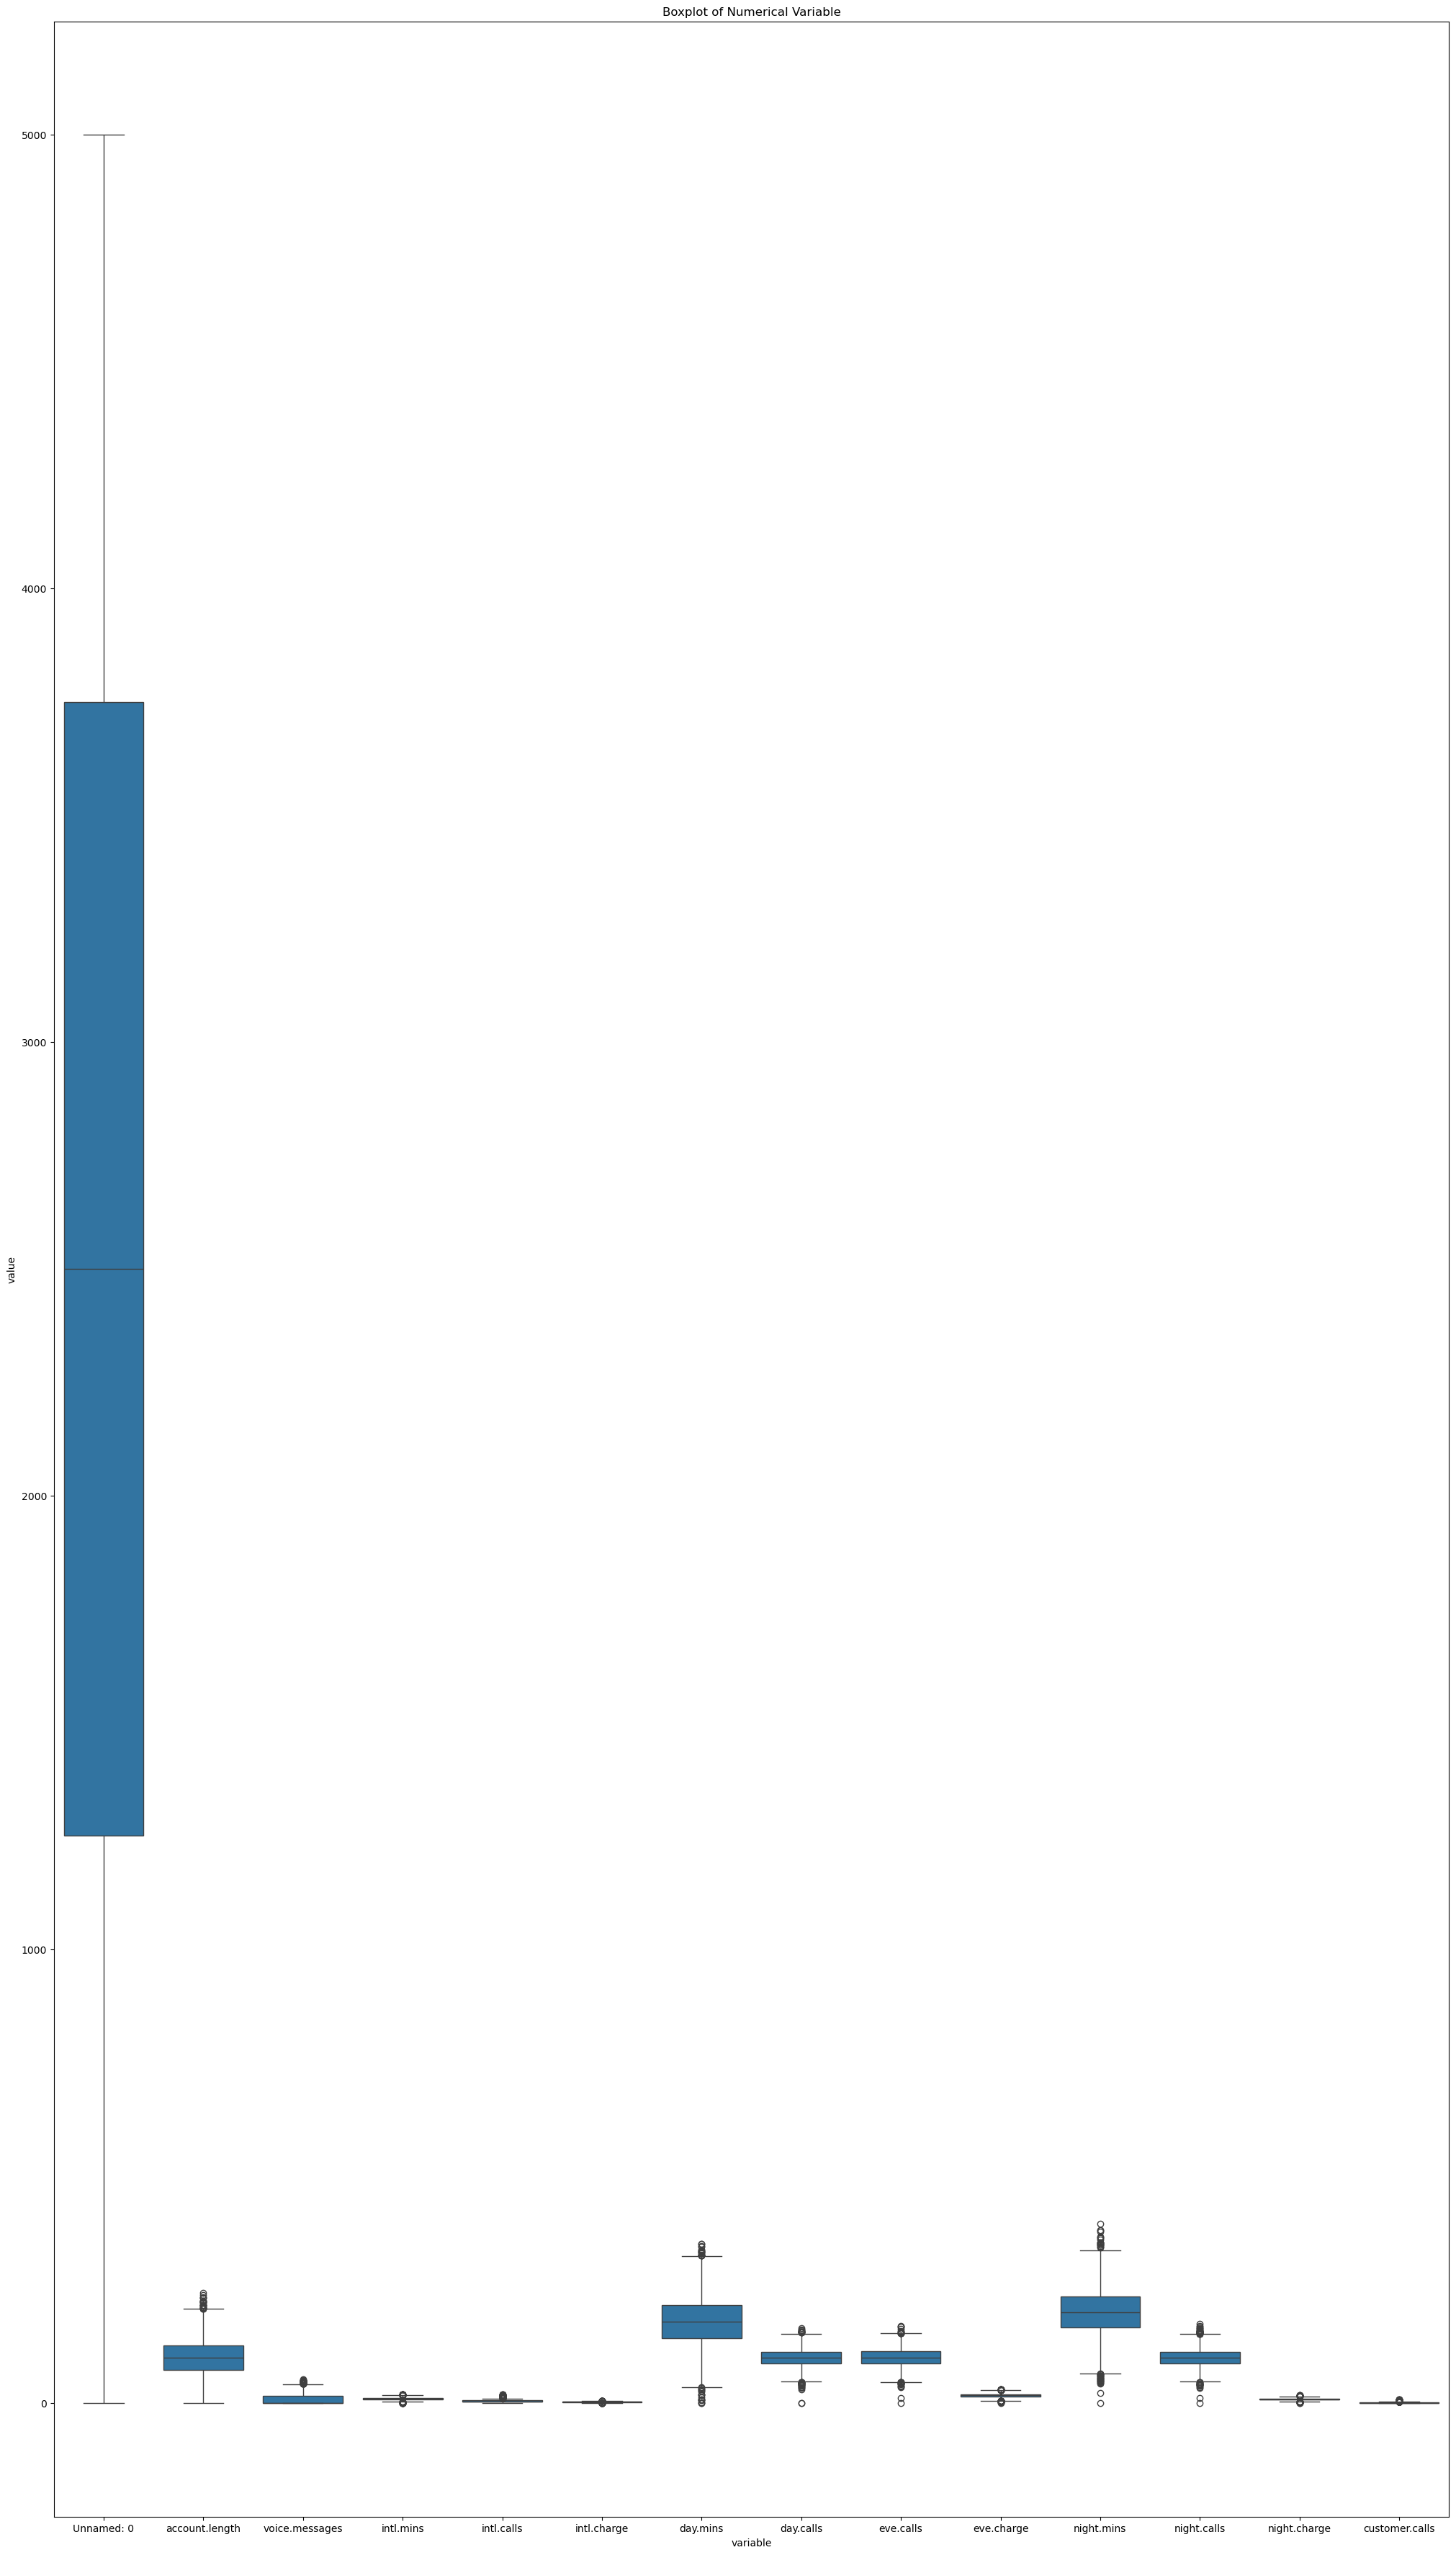

In [20]:
# Box plot of Numerical columns
plt.figure(figsize=(25,45))
sns.boxplot(x="variable", y="value", data=pd.melt(data[numerical_columns]))
plt.title('Boxplot of Numerical Variable')
plt.show()

categorical variable
      state      area.code voice.plan intl.plan day.charge eve.mins churn
0       KS  area_code_415        yes        no      45.07    197.4    no
1       OH  area_code_415        yes        no      27.47    195.5    no
2       NJ  area_code_415         no        no      41.38    121.2    no
3       OH  area_code_408         no       yes       50.9     61.9    no
4       OK  area_code_415         no       yes      28.34    148.3    no
...    ...            ...        ...       ...        ...      ...   ...
4995    HI  area_code_408        yes        no      40.07      223    no
4996    WV  area_code_415         no        no      31.31    256.8   yes
4997    DC  area_code_415         no        no       23.9    172.8    no
4998    DC  area_code_510         no        no       32.1    171.7    no
4999    VT  area_code_415        yes        no         22    267.1    no

[5000 rows x 7 columns]
Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'day.charge',
       

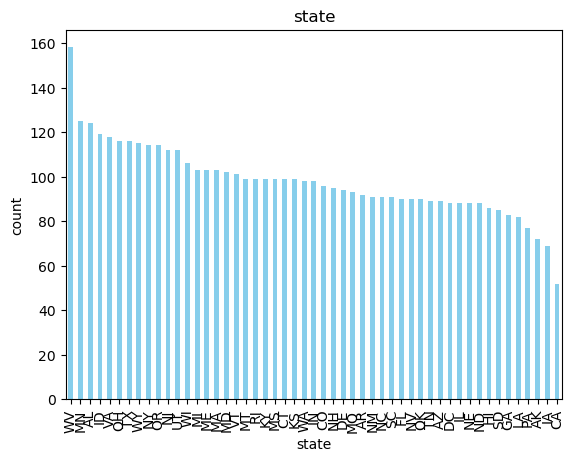

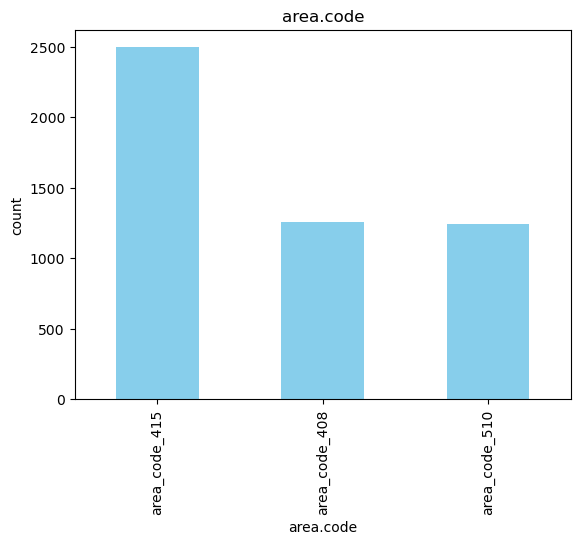

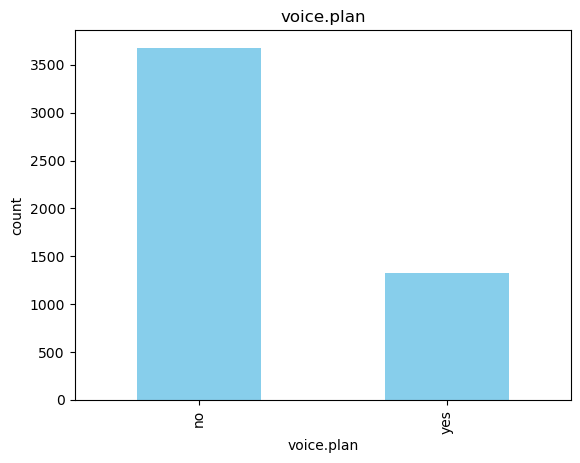

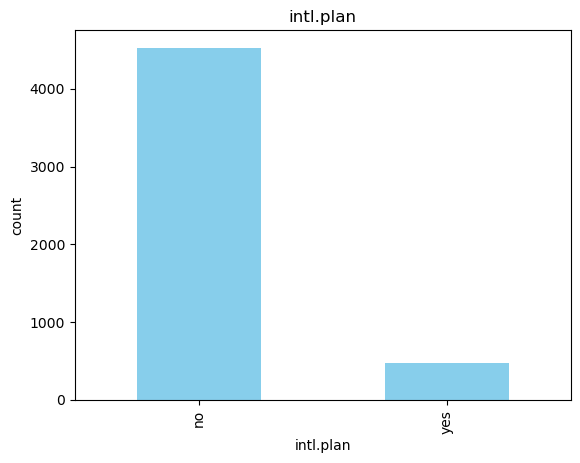

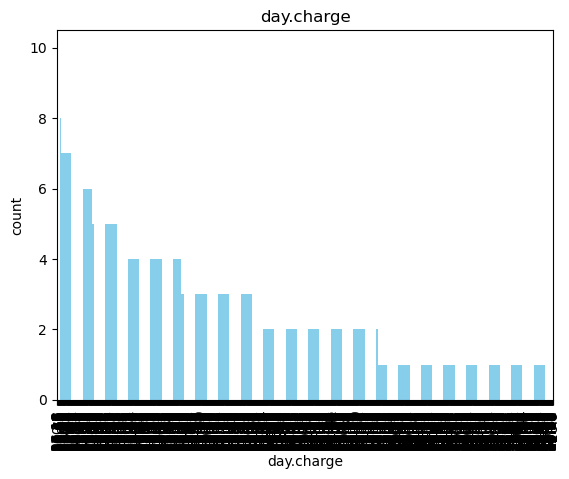

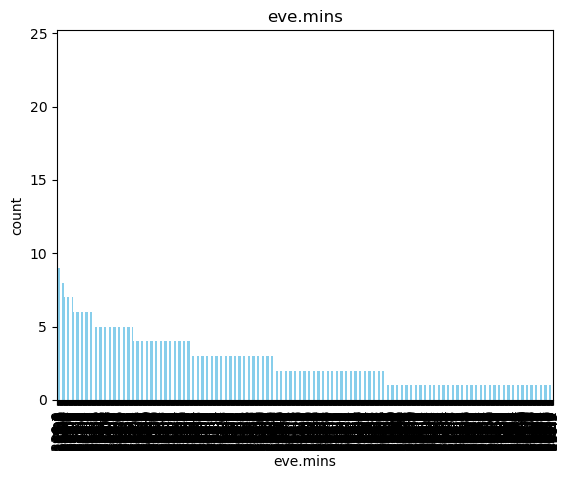

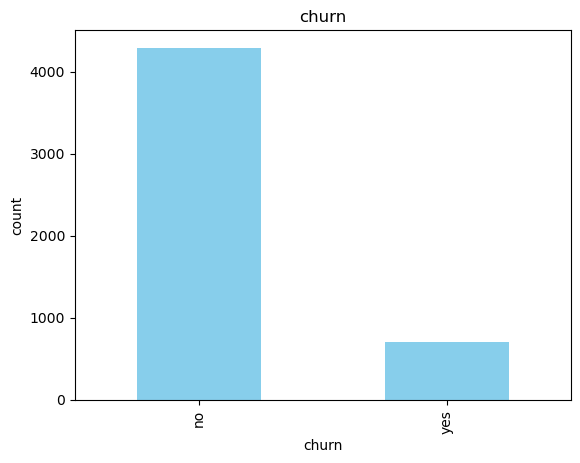

In [21]:
categorical_variable=data.select_dtypes(include=['object'])
print("categorical variable\n",categorical_variable)
print(categorical_variable.columns)
for column in categorical_variable:
    data[column].value_counts().plot(kind='bar',color=['skyblue'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()


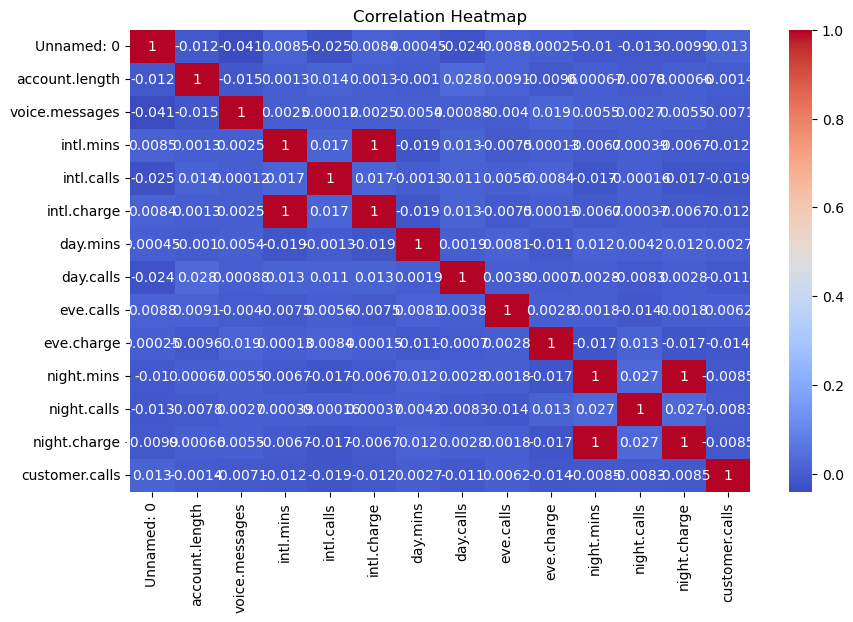

In [22]:
# Heatmap of numerical columns
numerical_columns = data.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x1500 with 0 Axes>

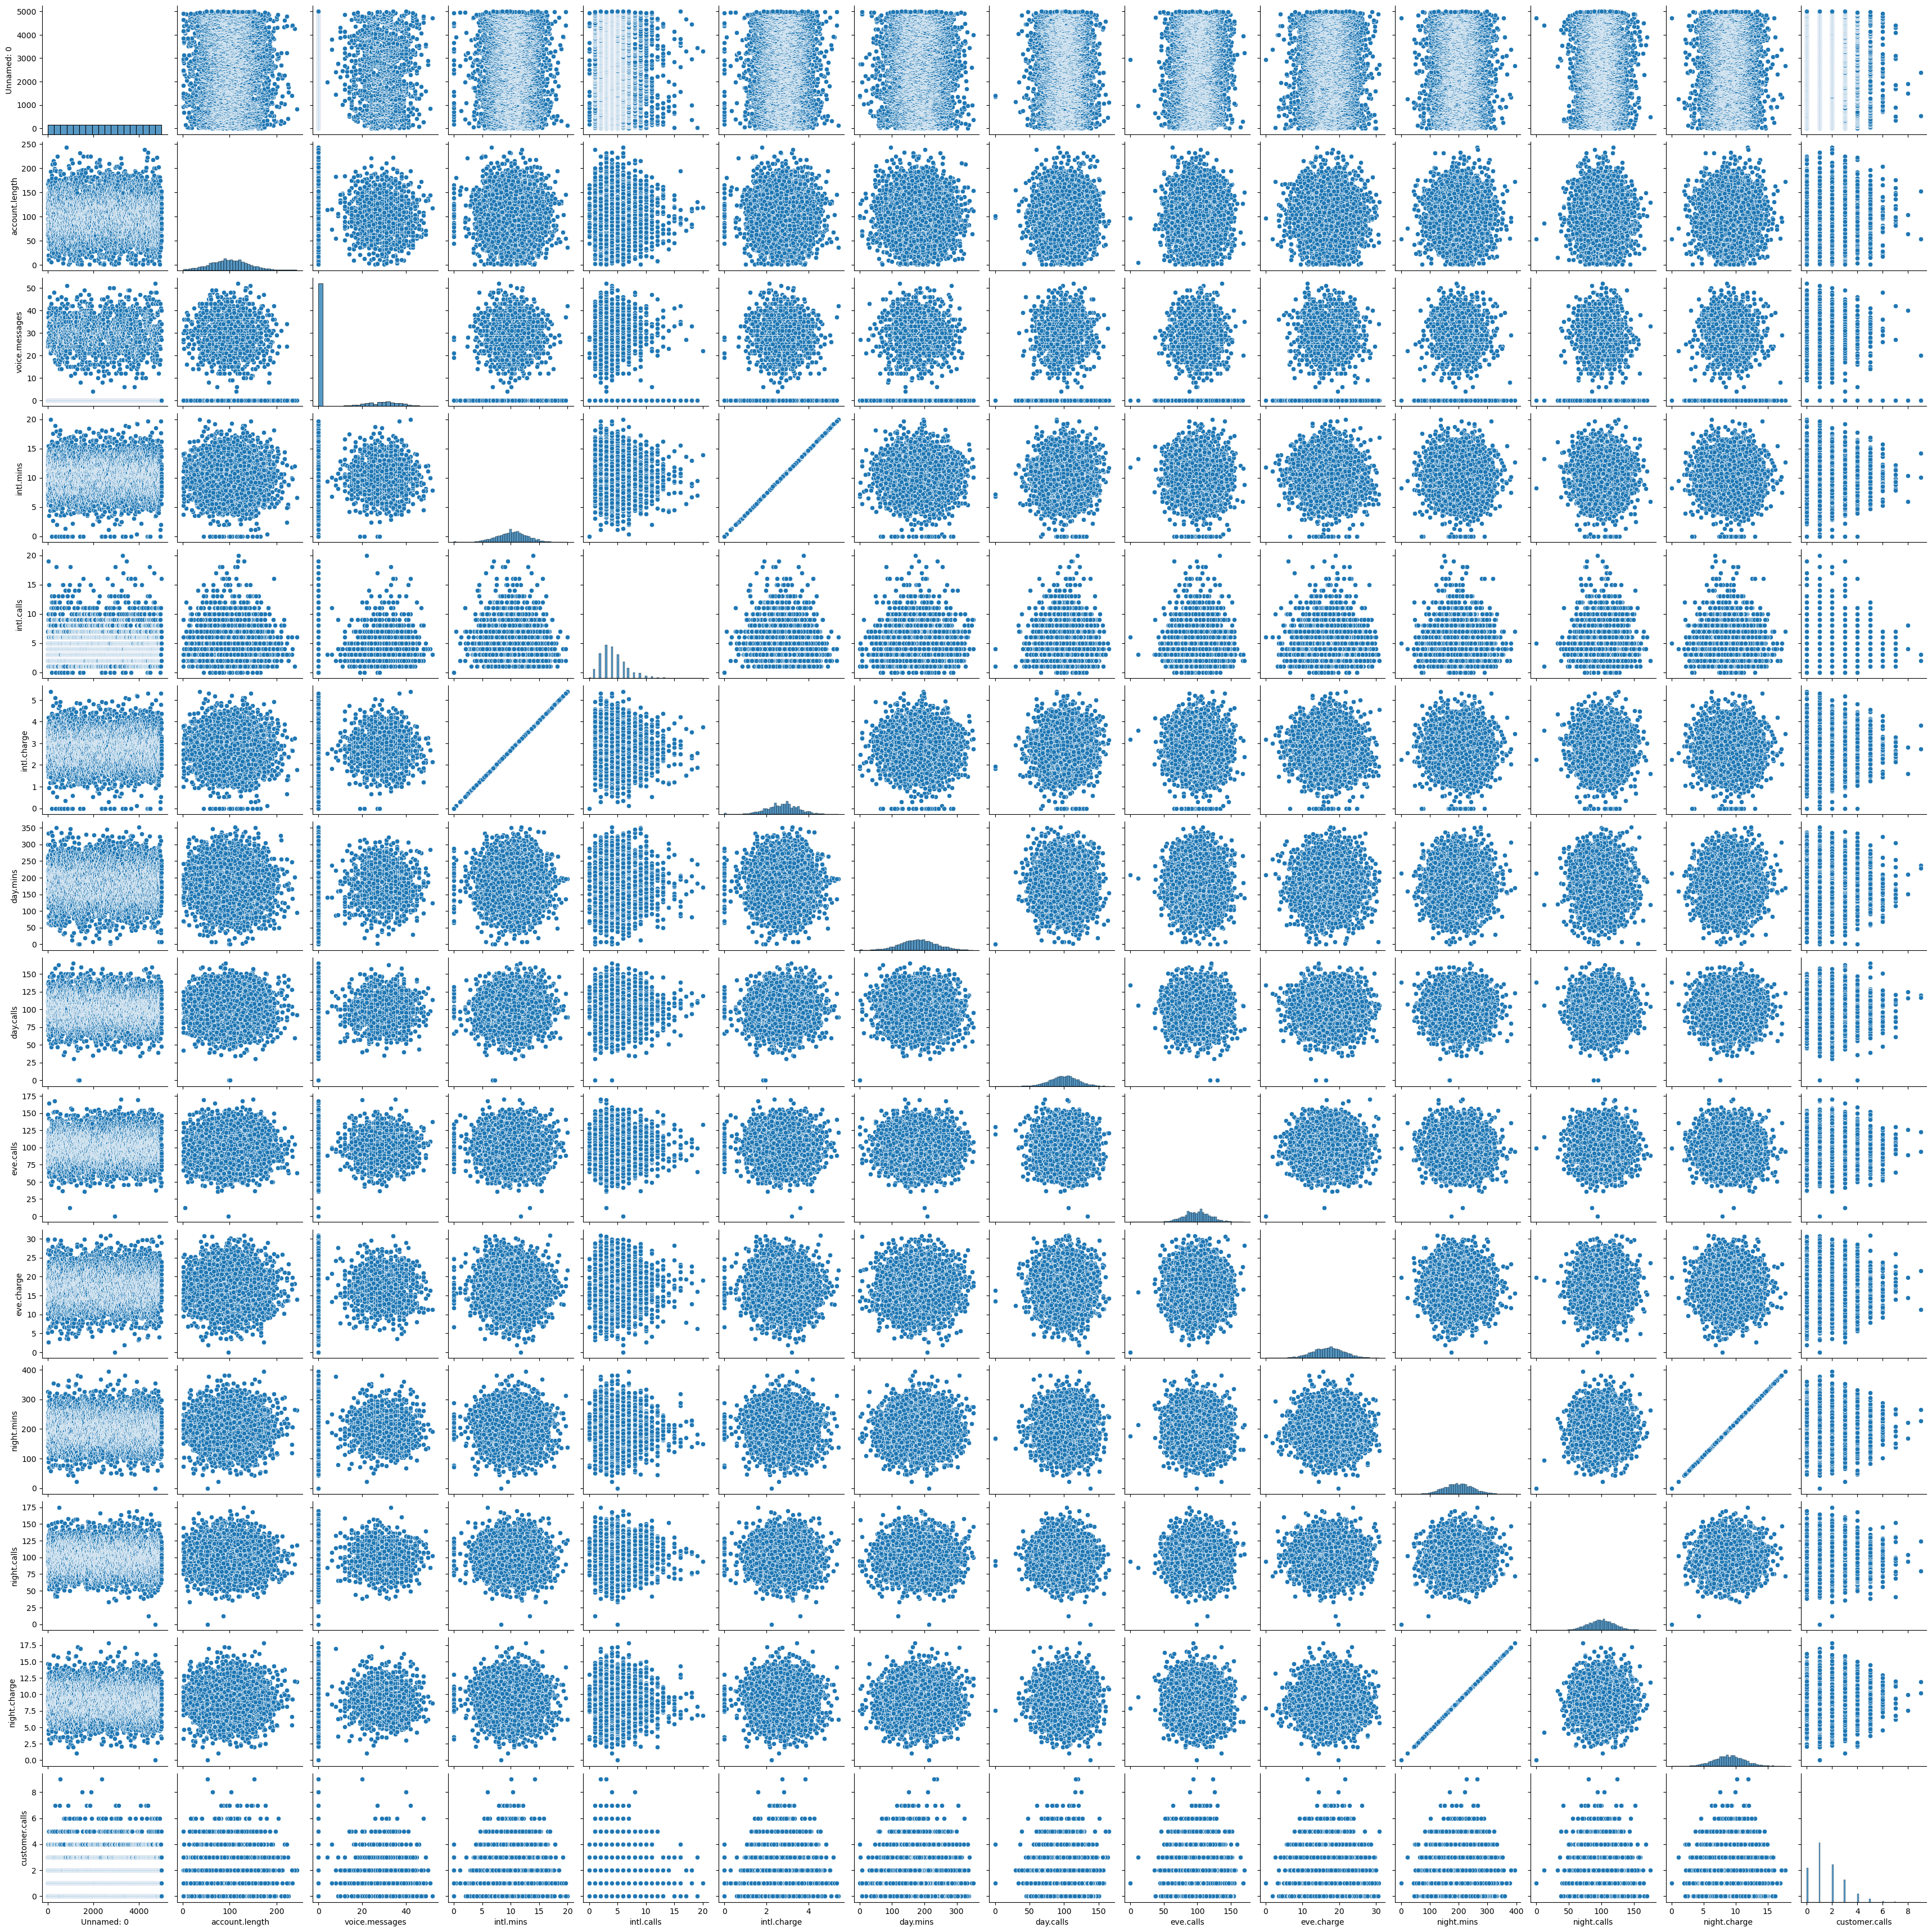

In [23]:
plt.figure(figsize=(10, 15))
sns.pairplot(data)
plt.show()


Feature Engineering

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Label Encoding binary columns (yes/no)
data['voice.plan'] = data['voice.plan'].map({'yes': 1, 'no': 0})
data['intl.plan'] = data['intl.plan'].map({'yes': 1, 'no': 0})

# Encoding 'state' using LabelEncoder
label_enc = LabelEncoder()
data['state'] = label_enc.fit_transform(data['state'])

# Check for missing values
print(data.isnull().sum())


Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [27]:
# Check if 'area.code' column still exists before trying to create dummies
if 'area.code' in data.columns:
    # Convert area code columns to numeric using get_dummies
    area_code_dummies = pd.get_dummies(data['area.code'], prefix='area_code')
    # Concatenate dummy variables with the original dataframe and drop the original column
    data = pd.concat([data, area_code_dummies], axis=1)
    data = data.drop('area.code', axis=1)

# Separate features and target AFTER creating dummies
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable (1 = churn, 0 = loyal)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


# Apply StandardScaler to scale numeric features
scaler = StandardScaler()
# Ensure you are fitting and transforming on the correct data (with dummies)
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train shape: (4000, 22)
X_test shape: (1000, 22)
y_train shape: (4000,)
y_test shape: (1000,)
X_train_scaled shape: (4000, 22)
X_test_scaled shape: (1000, 22)


Model Buliding

Logistic Regression

In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply StandardScaler after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)





In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression model
log_model = LogisticRegression(max_iter=400, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8690
Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.97      0.93       861
         yes       0.57      0.24      0.34       139

    accuracy                           0.87      1000
   macro avg       0.73      0.61      0.63      1000
weighted avg       0.84      0.87      0.85      1000



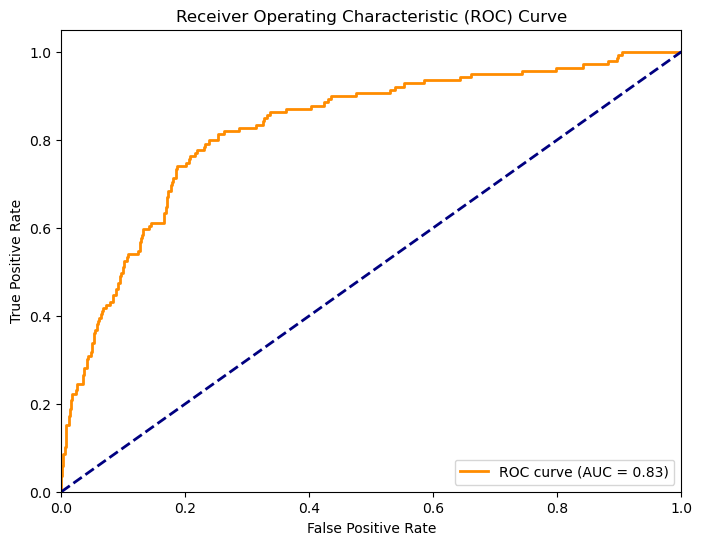

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn = 1)
# Changed 'best_log_model' to 'log_model'
y_probs_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Assuming 'yes' is the positive class
# Replace 'yes' and 'no' with 1 and 0 respectively in y_test
y_test_numeric = [1 if value == 'yes' else 0 for value in y_test]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs_log) # Use y_test_numeric
roc_auc = roc_auc_score(y_test_numeric, y_probs_log) # Use y_test_numeric


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

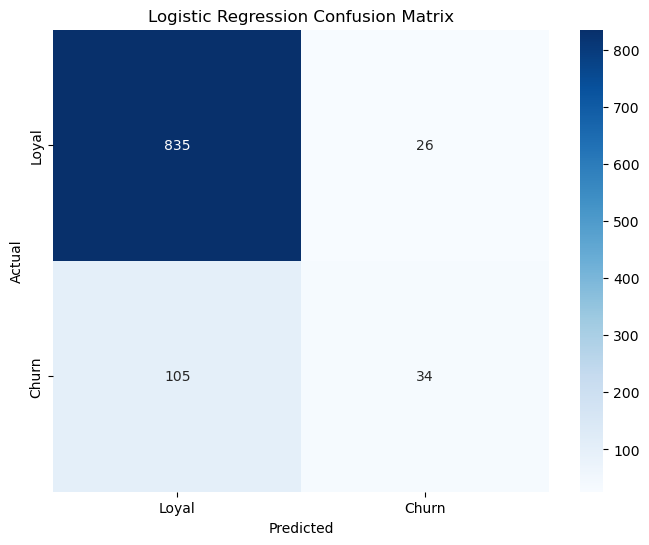

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_pred_log from the previous cell is the intended prediction
conf_matrix = confusion_matrix(y_test, y_pred_log)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the KNN model with default parameters
knn_model = KNeighborsClassifier(n_neighbors=5)  # K=5 by default
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy (K=5): {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy (K=5): 0.8900
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94       861
         yes       0.73      0.33      0.46       139

    accuracy                           0.89      1000
   macro avg       0.82      0.66      0.70      1000
weighted avg       0.88      0.89      0.87      1000



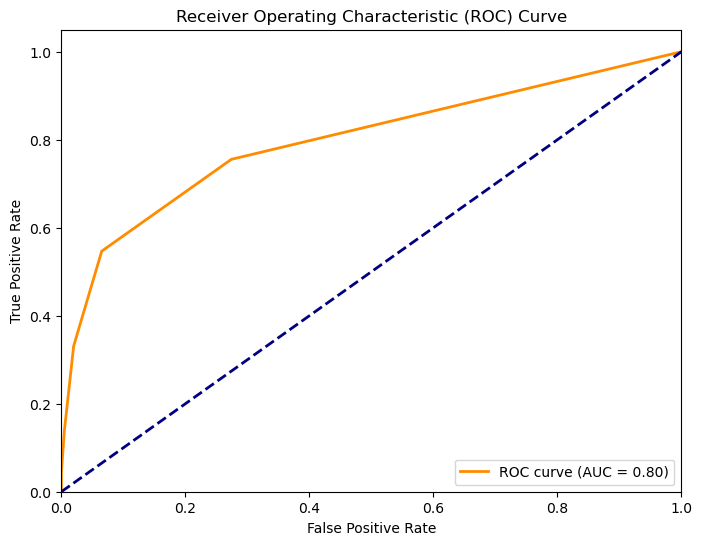

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (churn = 1)
# Changed 'best_knn_model' to 'knn_model'
y_probs_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Assuming 'yes' is the positive label
# Replace 'yes' and 'no' with 1 and 0 respectively in y_test
y_test_numeric = [1 if label == 'yes' else 0 for label in y_test]

# Compute ROC curve and AUC score using the numeric target variable
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_probs_knn)
roc_auc = roc_auc_score(y_test_numeric, y_probs_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

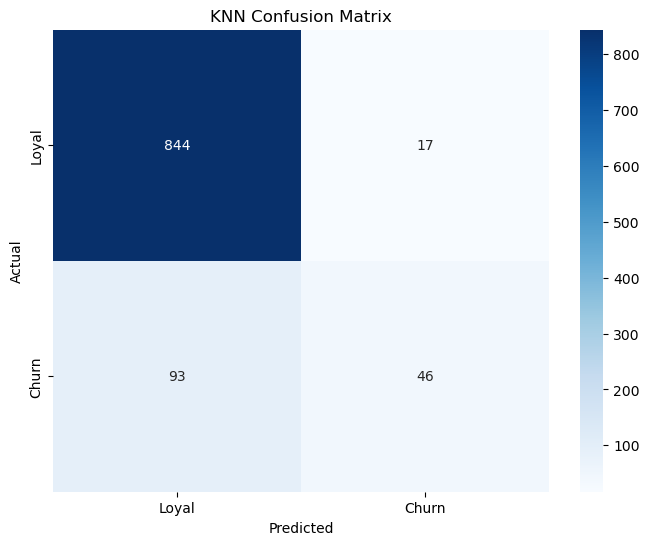

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_pred_knn from the previous KNN model cell is the intended prediction
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classifier

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Create a Random Forest Classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)


Random Forest Accuracy: 0.9610
Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.99      0.98       861
         yes       0.93      0.78      0.85       139

    accuracy                           0.96      1000
   macro avg       0.95      0.88      0.91      1000
weighted avg       0.96      0.96      0.96      1000



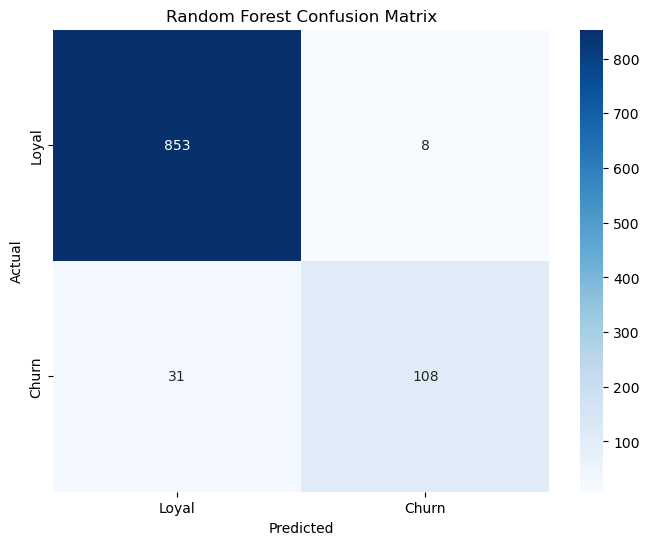

In [44]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loyal', 'Churn'], yticklabels=['Loyal', 'Churn'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ROC-AUC Score: 0.9181


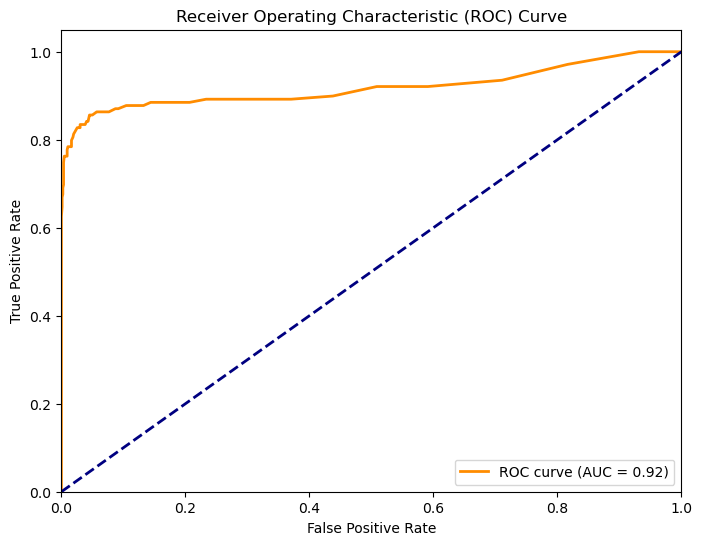

In [45]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class (churn = 1)
y_probs_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf, pos_label='yes')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


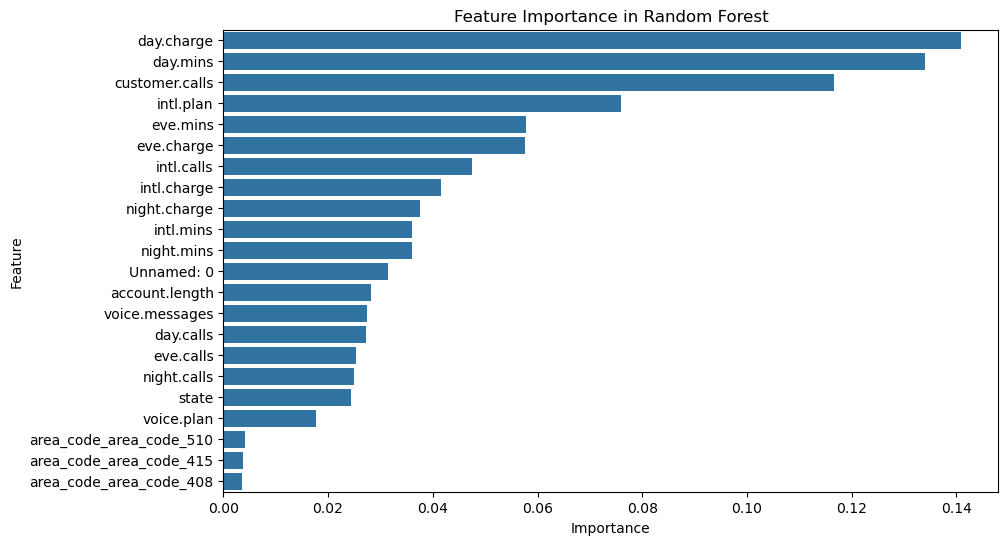

In [46]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


Deployment

In [48]:
!pip install streamlit
import streamlit as st
import numpy as np
import pickle
import os


In [106]:
model_path = 'logistic_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
else:
    st.error(f"Model file not found at: {model_path}")
    st.stop()  # Stop execution if model file is not found



2024-11-08 21:47:49.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:49.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:49.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [108]:
st.title('Logistic Regression Predictor')
st.write('This app predicts the target variable based on user inputs using a Logistic Regression model.')


2024-11-08 21:47:51.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:51.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:51.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:51.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:51.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:47:51.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [51]:
st.header('Input Features')
feature_1 = st.number_input('Feature 1')
feature_2 = st.number_input('Feature 2')



2024-11-08 21:25:35.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.063 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.067 Session state does not function when running a script without `streamlit run`
2024-11-08 21:25:35.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25

In [52]:
features = np.array([[feature_1, feature_2]])
if st.button('Predict'):
    prediction = model.predict(features)
    st.write(f'Predicted class: {int(prediction[0])}')



2024-11-08 21:25:35.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


KNN

In [54]:
import streamlit as st
import numpy as np
import pickle
import os


In [55]:
model_path = 'knn_model.pkl'


In [56]:
if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
else:
    st.error(f"Model file not found at: {model_path}")
    st.stop()


2024-11-08 21:25:35.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [57]:
st.title('K-Nearest Neighbors (KNN) Predictor')
st.write('This app predicts the target variable based on user inputs using a KNN model.')


2024-11-08 21:25:35.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [58]:
st.header('Input Features')
feature_1 = st.number_input('Feature 1')
feature_2 = st.number_input('Feature 2')
# Add more input fields as required for your model


2024-11-08 21:25:35.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [59]:
features = np.array([[feature_1, feature_2]])


In [60]:
if st.button('Predict'):
    prediction = model.predict(features)
    st.write(f'Predicted class: {int(prediction[0])}')


2024-11-08 21:25:35.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Rondom Forest

In [62]:
import streamlit as st
import numpy as np
import pickle
import os


In [63]:
model_path = 'random_forest_model.pkl'  # Assuming the model is in the same directory


In [64]:
if os.path.exists(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
else:
    st.error(f"Model file not found at: {model_path}")
    st.stop()


2024-11-08 21:25:35.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [65]:
st.title('Random Forest Predictor')
st.write('This app predicts the target variable based on user inputs using a Random Forest model.')


2024-11-08 21:25:35.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [66]:
st.header('Input Features')
feature_1 = st.number_input('Feature 1')
feature_2 = st.number_input('Feature 2')



2024-11-08 21:25:35.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.246 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.247 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.248 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [67]:
features = np.array([[feature_1, feature_2]])
if st.button('Predict'):
    prediction = model.predict(features)
    st.write(f'Predicted class: {int(prediction[0])}')


2024-11-08 21:25:35.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-08 21:25:35.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
